In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt

** Beschreibung der Bestandteile des Datensatzes
- Wo kommt der Datensatz her?                                    
(Das kommt aus sklearn.datasets)

- Wer hat die Daten aufgenommen, erhoben oder zusammengestellt?  
(The data originates from the 1990 U.S. Census for block groups in California.
The data was processed and made available by researchers who used it in a statistical analysis paper: "Sparse spatial autoregressions" by Pace and Barry (1997).
  https://www.kaggle.com/datasets/camnugent/california-housing-prices)

- Wieviele Attribute und wieviele Datensätze sind enthalten?     
(Es gibt insgesamt 20640 Datensätze und 8 Attribute.)

- Beschreibung jedes einzelnen[fn::Falls vom Umfang her möglich, sonst
  maximal zehn.] Attributs:
  - Um was handelt es sich?
  - Wieviele Ausprägungen hat dieses Attribut?
  - Ist es nominal, ordinal oder numerisch?
(
Attribute: 
-Medianeinkommen (Median Income)
-Durchschnittliche Anzahl der Zimmer (Average Number of Rooms)
-Durchschnittliche Anzahl der Schlafzimmer (Average Number of Bedrooms)
-Bevölkerung pro Hektar (Population per Acre)
-Anteil an Haushalten mit einem Einkommen unter 50.000 USD (Percentage of Households Below Poverty Level)
-Kriminalitätsrate (Crime Rate)
-Anteil an Haushalten, die nicht Eigentümer sind (Percentage of Households Not Owner Occupied)
-Medianes Alter der Wohnbevölkerung (Median Age of Housing Units;
Jedes Atrribute hat 20640 Ausprängungen;
Die Data ist type float64)
)

- Versuchen Sie Hintergrundinformationen zu den Attributen zu
  erlangen, so dass Ihre Analyse auf mehr Fachwissen fußt.
(???)

In [2]:
##### import data and define it as HOUSING, then to show original data shape and columms names
housing = fetch_california_housing()
print(type(housing))
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[:])

<class 'sklearn.utils._bunch.Bunch'>
(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
##### change original data to dataframe type then modify it and and a target columms in it, also showing the atrribute dtype
#####(target feature here means price: Jeder Datensatz repräsentiert ein Haus in Kalifornien. Die Zielvariable ist der Medianwert des Hauses in 100.000 USD-Einheiten.)

df = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add the target variable (if applicable)
if hasattr(housing, 'target'):
    df['target'] = housing.target
df_new= df
print(df_new.dtypes)
print(df_new)

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635  

** Deskriptive Analyse des Datensatzes
Analysieren sie jedes vorgestellte Attribut und gehen Sie dabei
besonders auf folgendes ein:
- Was sind die größte und die kleinste Ausprägung bei ordinalen Daten?
- Was sind Mittelwert und Standardabweichung bei numerischen Daten?
- Wie sehen die Verteilungen der Ausprägungen aus?

In [4]:
df_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df_new.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
""" import matplotlib.pyplot as plt

# Annahme: df enthält das DataFrame und 'HouseAge' ist ein Merkmal darin
df['HouseAge'].hist()
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.title('Distribution of House Age')
plt.show() """

" import matplotlib.pyplot as plt\n\n# Annahme: df enthält das DataFrame und 'HouseAge' ist ein Merkmal darin\ndf['HouseAge'].hist()\nplt.xlabel('House Age')\nplt.ylabel('Frequency')\nplt.title('Distribution of House Age')\nplt.show() "

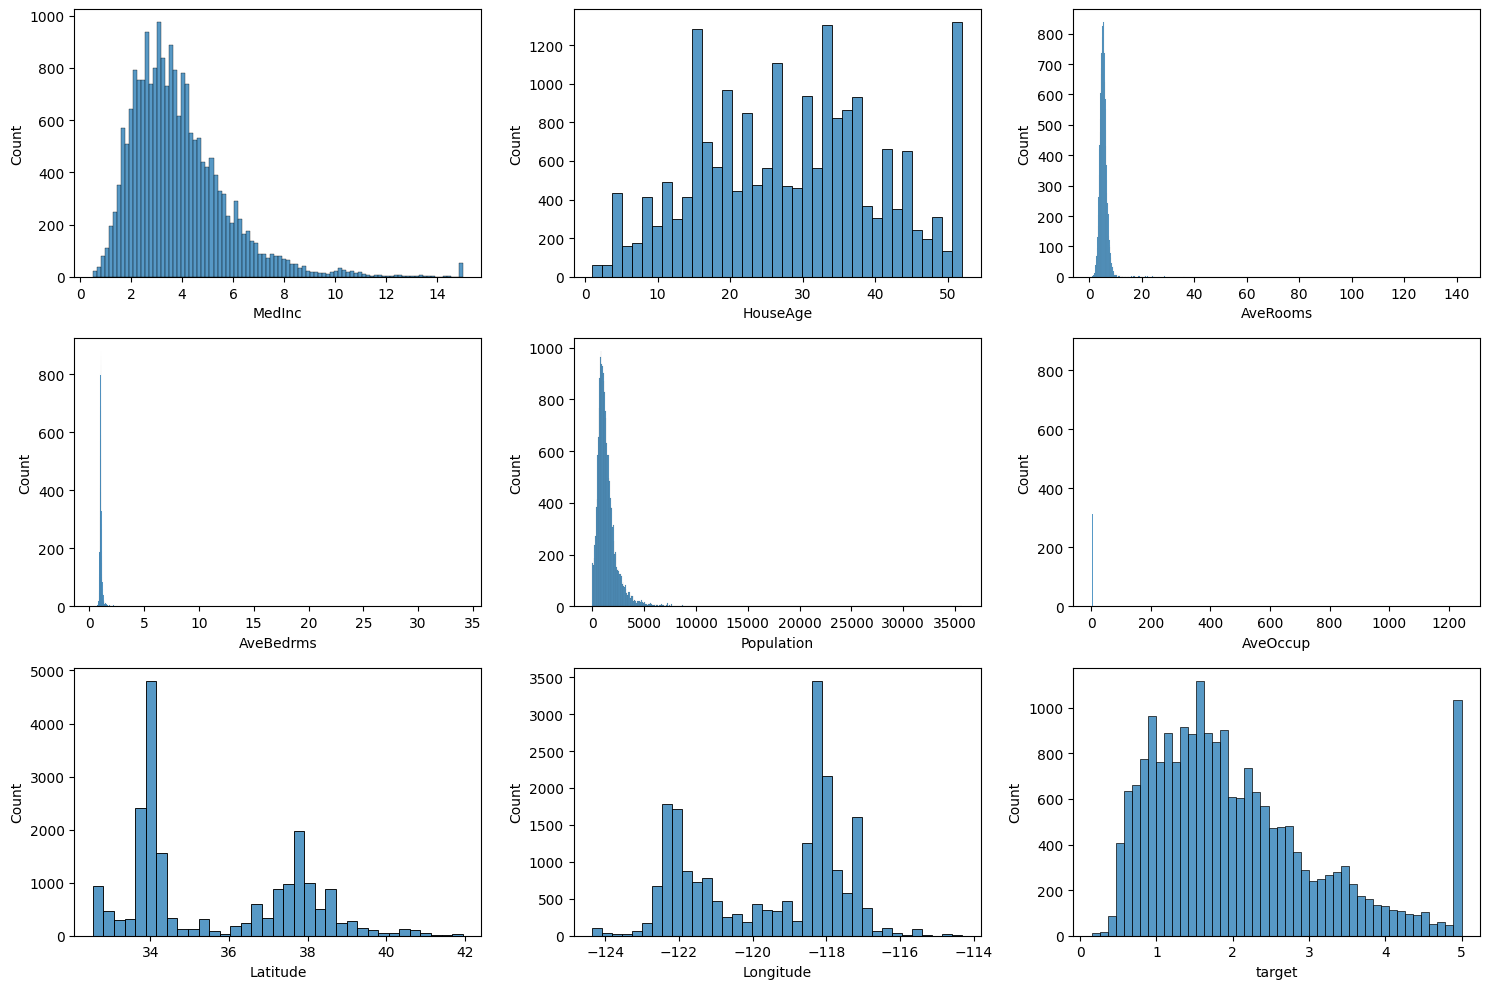

In [7]:
##### columms names: MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude	target
nrows= 3
ncols= 3
fig, axes = plt.subplots(nrows= nrows, ncols= ncols, figsize=(15, 10))
data1= df_new['MedInc']
data2= df_new['HouseAge']
data3= df_new['AveRooms']
data4= df_new['AveBedrms']
data5= df_new['Population']
data6= df_new['AveOccup']
data7= df_new['Latitude']
data8= df_new['Longitude']
data9= df_new['target']
# 在每个子图上使用sns.distplot()绘制直方图和核密度估计图
sns.histplot(data1, ax=axes[0, 0])
sns.histplot(data2, ax=axes[0, 1])
sns.histplot(data3, ax=axes[0, 2])
sns.histplot(data4, ax=axes[1, 0])
sns.histplot(data5, ax=axes[1, 1])
sns.histplot(data6, ax=axes[1, 2])
sns.histplot(data7, ax=axes[2, 0])
sns.histplot(data8, ax=axes[2, 1])
sns.histplot(data9, ax=axes[2, 2])
"""longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity"""
plt.tight_layout()
plt.savefig('/home/fe/twang/tayyeb/tayeb_HA/house_x_train_features_histplot.png')
#plt.show()

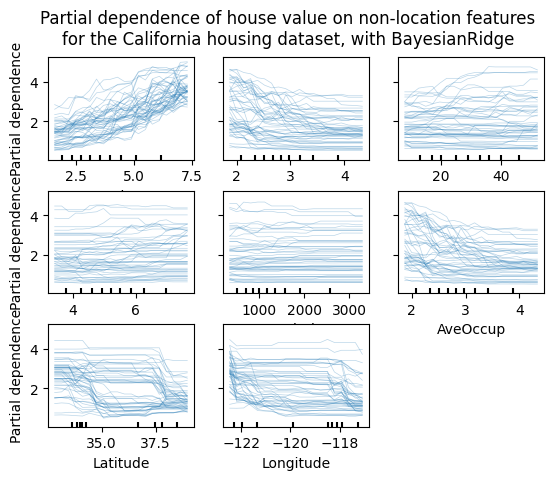

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
features = ["MedInc", "AveOccup", "HouseAge", "AveRooms", "Population", "AveOccup", "Latitude", "Longitude"]
est = RandomForestRegressor(n_estimators=10)
est.fit(X, y)

# plot_partial_dependence has been removed in version 1.2. From 1.2, use
# PartialDependenceDisplay instead.
# display = plot_partial_dependence(
display = PartialDependenceDisplay.from_estimator(
    est,
    X,
    features,
    kind="individual",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
)
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with BayesianRidge"
)
display.figure_.subplots_adjust(hspace=0.3)

** Beziehungen zwischen Variablen
Nutzen Sie die in der Vorlesung eingeführten rechnerischen und
grafischen Hilfsmittel um Beziehungen zwischen Variablen des
Datensatzes zu finden. Beachten Sie dabei folgendes:
- Analysieren Sie die Beziehungen zwischen den Variablen mit den in
  der Vorlesung vorgestellten Methoden.
- Weisen Sie auf Besonderheiten hin.
- Formulieren Sie darauf basierend (und basierend auf dem deskriptiven
  Teil) Fragestellungen zu Ihrem Datensatz

In [12]:
corrboston = fetch_california_housing.corr()
#corrboston
plt.figure(figsize=(10,10))    #设置画布
sns.heatmap(corrboston,annot=True,cmap='RdGy')
plt.show()

AttributeError: 'function' object has no attribute 'corr'

** Induktive Analyse
- Untersuchen Sie den Datensatz hinsichtlich der von Ihnen erstellten
  Fragestellungen und Hypothesen.
- Verwenden Sie geeignete Test-Statistiken und -Verfahren.
- Nehmen Sie Stellung zu Ihren Aussagen.
- Zeigen Sie auf, wie eine weitere/tiefergehende Analyse aussehen
  müßte. Welche Daten müssten herangezogen werden?

** Diskussion
- Für wie anwendbar halten Sie die von Ihnen erhaltenen Ergebnisse?
- Können Sie für die Aufnahme der Daten einen etwaigen systemischen
  Bias identifizieren welcher die Aussagen fragwürdig erscheinen läßt?

** Bonus
- Falls möglich, versuchen Sie ihren Datensatz mit weiteren Daten
  anzureichern oder einen weiteren, denselben Sachverhalt
  beschreibenden, Datensatz zu besorgen. Erweitern Sie danach Ihre
  Analyse um die angereicherten Daten.